In [1]:
import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
import sys
from cymetric import graphs as cgr
#sys.path.append('../../cyan2python/')
#import cyan2python as c2p
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:

from cymetric import timeseries as tm

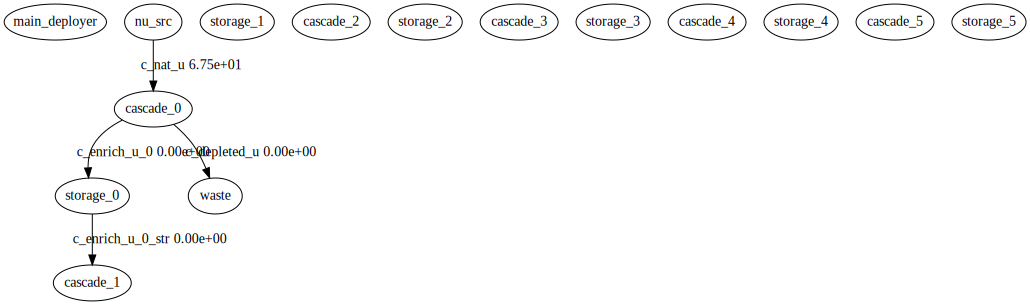

In [4]:
db_ = cym.dbopen("cyclus.sqlite")
ev_ = cym.Evaluator(db=db_, write=False)
cgr.flow_graph(ev_)


In [4]:
#df2 = c2p.GetInventory(facilities=["Cascade", "LEU"])

In [5]:
def fracmass_to_frac_atom(mass):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    return mass * uma_238 / uma_235

def get_frac(file):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.inventories(ev, facilities=["storage"], nucs=['238U'])
    df1_u5 = tm.inventories(ev, facilities=["storage"], nucs=['235U'])
    df_r = (df1_u5/uma_235)/(df1_u8/uma_238 + df1_u5/uma_235)
    return df_r.at[2,'Quantity']

def get_frac_feed(file):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.transactions(ev, senders=["nu_src"], nucs=['238U'])
    df1_u5 = tm.transactions(ev, senders=["nu_src"], nucs=['235U'])

    df_r = (df1_u5/uma_235)/(df1_u8/uma_238 + df1_u5/uma_235)
    return df_r.at[5,'Mass']


In [6]:
get_frac_feed('cyclus_b0.sqlite')

0.0070992900869481478

In [7]:
get_frac('cyclus_b0.sqlite')

0.037575595979294538

In [8]:
get_frac_feed('cyclus_b1.sqlite')

0.037576000081857741

In [9]:
get_frac('cyclus_b1.sqlite')

0.17368366131827095

In [10]:
get_frac_feed('cyclus_b2.sqlite')

0.17368366164312479

In [12]:
get_frac('cyclus_b2.sqlite')

0.53086206967755012

In [13]:
get_frac_feed('cyclus_b3.sqlite')

0.53086207024127208

In [14]:
get_frac('cyclus_b3.sqlite')

0.85899320060986961

In [15]:
get_frac_feed('cyclus_b4.sqlite')

0.85899320088403497

In [16]:
get_frac('cyclus_b4.sqlite')

0.97041052205514178

In [114]:
fracmass_to_frac_atom(0.071)

0.07190828542932376

In [115]:
0.037593438710957029/0.037607856498967321

0.9996166282965187

In [117]:
uma_235 = 235043928.190e-6
uma_238 = 238050786.996e-6
uma_235 / uma_238



0.9873688348442615